## DataSet Adult annual salary

Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


Attribute Information:
 
Listing of attributes:

>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [92]:
#Bibilotecas básicas 
import pandas as pd
import numpy as np

#Bibliotecas de DataViz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import show


#split and balancing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample 

#tratamento de categóricas
#from feature_engine import categorical_encoders as ce

#pre-processing
from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

#Pielineline
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline 


#Modeling
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


#estatística e métricas
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#otimização de modelos
from sklearn.model_selection import GridSearchCV

# PCA - DataCompression
from sklearn.decomposition import PCA

#Cluesterização
#from sklearn.metrics import silhouette_score 
#from sklearn.cluster import KMeans
#from sklearn.cluster import MeanShift
#from sklearn.cluster import DBSCAN



#esembles
#from sklearn.naive_bayes import GaussianNB
#from sklearn.ensemble import RandomForestClassifier, VotingClassifier
#import lightgbm as lgb 
#import xgboost as xgb 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## ETL

In [27]:
columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain',\
            'capital_loss','hours_per_week','native_country','target']

x_treino =  pd.read_csv('adult.data', header = None, names = columns)
x_treino.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
x_teste =  pd.read_csv('adult.test', header=None, names=columns, skiprows=1)
x_teste.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
#concatenate
x_treino.shape

(32561, 15)

In [6]:
x_teste.shape

(16281, 15)

In [29]:
df=pd.concat([x_treino,x_teste])
df.shape

(48842, 15)

In [9]:
def normal(df, col, threshold=0.05):
    try:
        zscore, p_value = stats.normaltest(df[col])
        if p_value < threshold:
            result = 'not_normal'
        else:
            result = 'normal'
    except:
        zscore = p_value = np.nan
        result = 'not_applicable'
    return result

def outliers_count_IQR(df, col):
    try:
        if len(df[col].unique())>2: # if para eliminar features binárias
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr_range = q3 - q1
            lower = q1 - 1.5*iqr_range
            upper = q3 + 1.5*iqr_range
            out_low = df[df[col] < lower].count()[0]
            out_up = df[df[col] > upper].count()[0]
            outliers = out_low + out_up
            outliers_perc = round(outliers / df.shape[0],2)
        else:
            outliers = np.nan
            outliers_perc = np.nan
    except:
        outliers = np.nan
        outliers_perc = np.nan
    return outliers, outliers_perc


def ETLtool_2(df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = df.columns.tolist()
      
    eda_df['Amount_Unique'] = pd.Series(map(lambda x: len(df[x].unique().tolist()), colunas), index=colunas)

    eda_df['Min'] = df.min()
    eda_df['Max'] = df.max()
    eda_df['Mean'] = df.mean().round(3)
    eda_df['STD'] = df.std().round(3)
    
    eda_df['Normality'] = pd.Series(map(lambda x: normal(df, x), colunas), index=colunas)
    eda_df['Amount_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[0], colunas), index=colunas)
    eda_df['%_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[1], colunas), index=colunas)
    df = pd.DataFrame(eda_df)
    return df.loc[colunas,:]



def ETLtool(df):
    
    df = df.rename(columns=str.lower)
    
    # separate num and categorical
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()
    
    eda_df = {}
    
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()

    eda_df['Amount_Unique'] = pd.Series({col: df[col].nunique() for col in df.columns})

    eda_df['Min'] = pd.Series({col: df[col].min() for col in num_cols})
    eda_df['Max'] = pd.Series({col: df[col].max() for col in num_cols})
    eda_df['Mean'] = pd.Series({col: round(df[col].mean(), 3) for col in num_cols})
    eda_df['STD'] = pd.Series({col: round(df[col].std(), 3) for col in num_cols})

    eda_df['Normality'] = pd.Series({col: normal(df, col) for col in num_cols})
    eda_df['Amount_Outliers'] = pd.Series({col: outliers_count_IQR(df, col)[0] for col in num_cols})
    eda_df['%_Outliers'] = pd.Series({col: outliers_count_IQR(df, col)[1] for col in num_cols})

    return pd.DataFrame(eda_df)



def unique_values(df):

    for cols in df.columns:
        if (len(df[cols].unique()) < 5) and (df[cols].dtypes == 'object'):                
            print(cols, ' = ', list(df[cols].unique()))
    return  None

In [12]:
etl_df = ETLtool(df)
etl_df

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Min,Max,Mean,STD,Normality,Amount_Outliers,%_Outliers
age,0,0.0,int64,48842,74,17.0,90.0,38.644,13.711,not_applicable,216.0,0.00
capital_gain,0,0.0,int64,48842,123,0.0,99999.0,1079.068,7452.019,not_applicable,4035.0,0.08
capital_loss,0,0.0,int64,48842,99,0.0,4356.0,87.502,403.005,not_applicable,2282.0,0.05
education,0,0.0,object,48842,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,0,0.0,int64,48842,16,1.0,16.0,10.078,2.571,not_applicable,1794.0,0.04
fnlwgt,0,0.0,int64,48842,28523,12285.0,1490400.0,189664.135,105604.025,not_applicable,1453.0,0.03
hours_per_week,0,0.0,int64,48842,96,1.0,99.0,40.422,12.391,not_applicable,13496.0,0.28
marital_status,0,0.0,object,48842,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
native_country,0,0.0,object,48842,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,0,0.0,object,48842,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
unique_values(df)

sex  =  [' Male', ' Female']
target  =  [' <=50K', ' >50K', ' <=50K.', ' >50K.']


In [31]:
#treating the target 
df['target'] = df['target'].replace(' <=50K.', '<=50K')
df['target'] = df['target'].replace(' >50K.', '>50K')
df['target'] = df['target'].replace(' <=50K', '<=50K')
df['target'] = df['target'].replace(' >50K', '>50K')

target
<=50K    37155
>50K     11687
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x17204041f40>,
 [Text(-0.8035625018699238, 0.7511905920527419, '<=50K'),
  Text(0.8035624667041533, -0.7511906296702167, '>50K')],
 [Text(-0.4383068192017766, 0.40974032293785917, '76.1%'),
  Text(0.4383068000204472, -0.40974034345648175, '23.9%')])

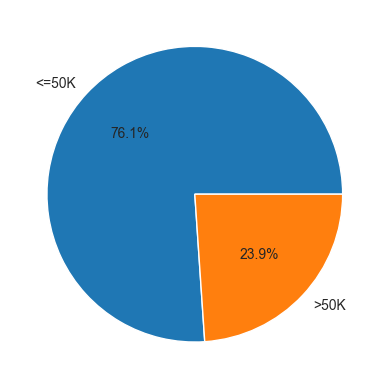

In [ ]:
#target balancing need check
print(df['target'].value_counts())

freq = df['target'].value_counts()
sns.set_style('white')
plt.figure()
plt.pie(freq.values, labels=freq.index, autopct='%1.1f%%' )

In [ ]:
#initial insights about actions and the data

## Many categorical columns with many unique values - think about how to handle them
### dummies can get too heavy
### labelencoder may assign weight to certain features, introducing bias

## no NaN values


## given the number of unique values, the fnlwgt column has no predictive power for the model - remove

## education_num -- could this be years of schooling? is it redundant with education?


## Actions


### remove fnlwgt
### check with value_counts the categorical columns
### convert the target to binary

In [32]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [33]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [34]:
df.native_country.value_counts()
# due to the unbalanced values we could have problem with this column.. the greatest count of the 'United-States' could create bias and 
# the values with few count with positive target, could create overfitting 

#maybe it is better to transform this column by continent

native_country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [35]:
# Exclude bad data (with lower count than 5 % from grand total)
df.drop(df[df['workclass'] == ' ?'].index , inplace=True)
df.drop(df[df['occupation'] == ' ?'].index , inplace=True)
df.drop(df[df['native_country'] == ' ?'].index , inplace=True)

In [37]:
del df['fnlwgt']

In [38]:
continent_map = {
    # America 
    ' United-States': 'North America',
    ' Canada': 'North America',
    ' Mexico': 'North America',
    ' Puerto-Rico': 'North America',
    ' Outlying-US(Guam-USVI-etc)': 'North America',
    ' El-Salvador': 'Central America',
    ' Guatemala': 'Central America',
    ' Honduras': 'Central America',
    ' Nicaragua': 'Central America',
    ' Cuba': 'Central America',
    ' Jamaica': 'Central America',
    ' Dominican-Republic': 'Central America',
    ' Trinadad&Tobago': 'Central America',
    ' Haiti': 'Central America',
    ' Ecuador': 'South America',
    ' Peru': 'South America',
    ' Columbia': 'South America',

    # Europe
    ' England': 'Europe',
    ' Germany': 'Europe',
    ' France': 'Europe',
    ' Italy': 'Europe',
    ' Greece': 'Europe',
    ' Portugal': 'Europe',
    ' Yugoslavia': 'Europe',
    ' Ireland': 'Europe',
    ' Scotland': 'Europe',
    ' Poland': 'Europe',
    ' Hungary': 'Europe',
    ' Holand-Netherlands': 'Europe',

    # Asia
    ' India': 'Asia',
    ' Iran': 'Asia',
    ' Philippines': 'Asia',
    ' Thailand': 'Asia',
    ' Cambodia': 'Asia',
    ' Laos': 'Asia',
    ' Vietnam': 'Asia',
    ' Taiwan': 'Asia',
    ' China': 'Asia',
    ' Hong': 'Asia',
    ' Japan': 'Asia',
    ' South': 'Asia'
}

df['native_country'] = df['native_country'].map(continent_map).fillna('Other')

In [51]:
df.native_country.value_counts()
# still too unbalanced, but we can test removing it later since it is data from USA 

native_country
North America      40426
Asia                 988
Europe               692
Central America      689
South America        165
Name: count, dtype: int64

### EDA - Exploratory Data Analysis

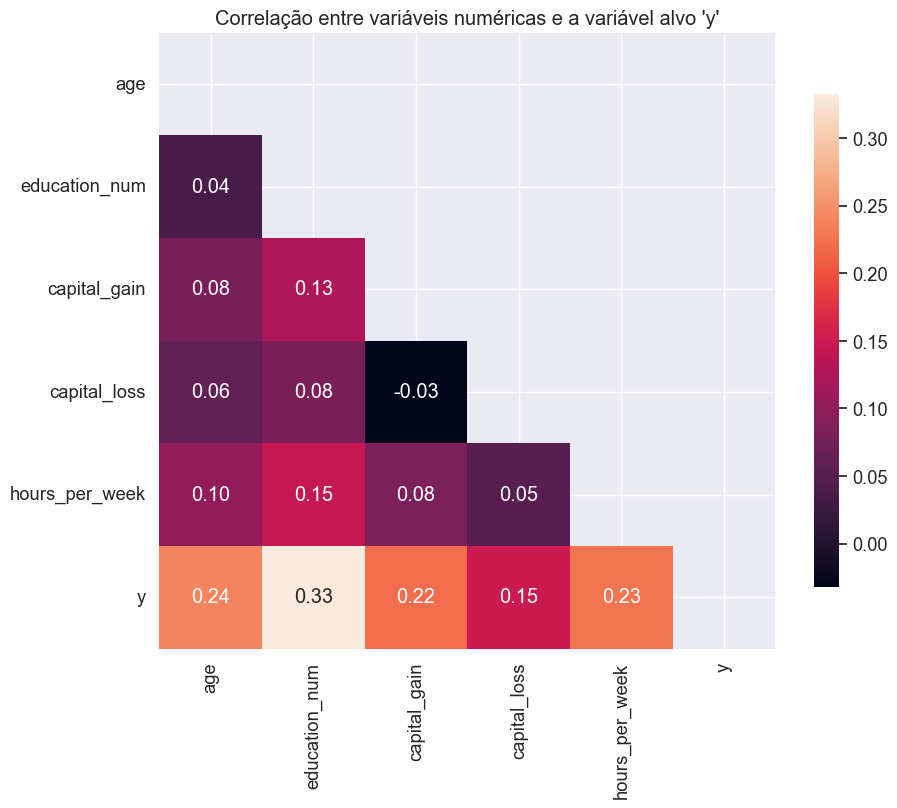

In [52]:
# Correlation analysis
df['y'] = (df['target'] == '>50K').astype(int)


# Selecionar apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular a matriz de correlação
corr = df_numeric.corr()

# Criar máscara para parte superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            fmt='.2f', 
            cmap='rocket', 
            square=True, 
            cbar_kws={"shrink": .8})
plt.title("Correlação entre variáveis numéricas e a variável alvo 'y'")
plt.show()

In [43]:
#correlation with the target 
df_numeric.corr().round(2)['y'].sort_values(ascending=False)

y                 1.00
education_num     0.33
age               0.24
hours_per_week    0.23
capital_gain      0.22
capital_loss      0.15
Name: y, dtype: float64

In [ ]:
# correlation and heatmap analysis:

# 'education_num' has the strongest positive correlation with the target (but not that strong 0.33)
#  this suggests that workers with higher education are more likely to have higher 'y' values.

# Other features with moderate positive correlation with the target include:
#  'age' (0.24)
#  'hours_per_week' (0.23)
#  'capital_gain' (0.22)
#  'capital_loss' (0.15)
# These variables also contribute positively to the prediction of the target, although it is also not that strong

# the correlation between independent variables is low, which is good for most machine learning models.


# most relevant features for predicting the target:
# - education_num
# - age
# - hours_per_week
# - capital_gain

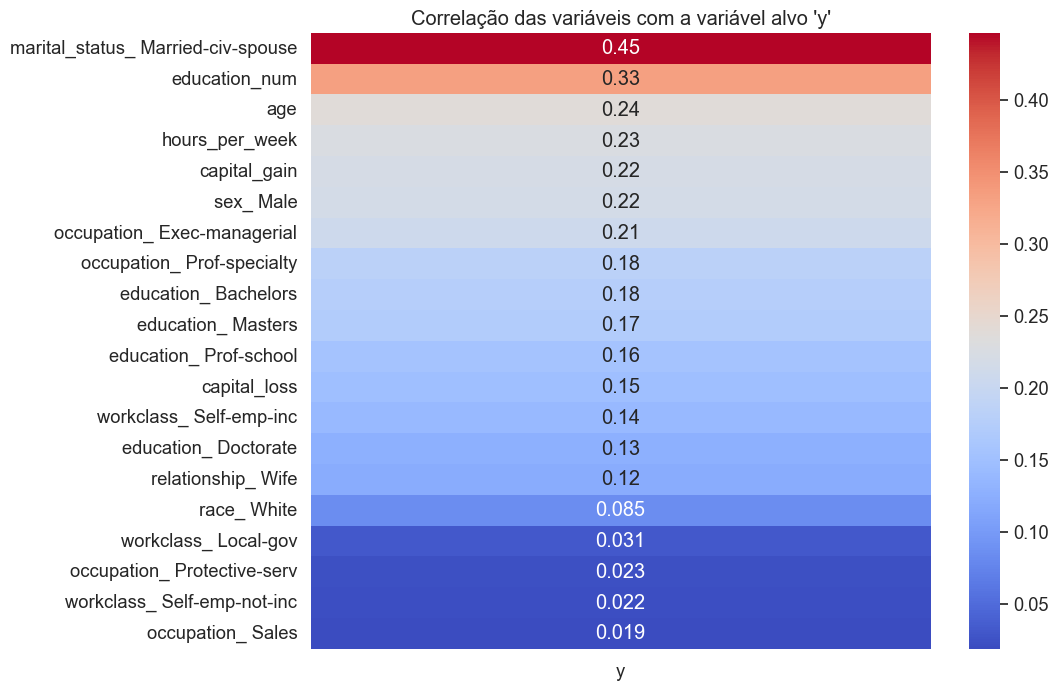

In [53]:

# Passo 2: Separar colunas categóricas e numéricas (exceto a target)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.drop('target')
numeric_cols = df.select_dtypes(include=['number']).columns.drop('y')  # já vamos usar 'y'

# Passo 3: Codificar só as categóricas
df_dummies = pd.get_dummies(df[categorical_cols], drop_first=True)

# Passo 4: Concatenar numéricas + dummies + y
df_encoded = pd.concat([df[numeric_cols], df_dummies, df['y']], axis=1)

# Passo 5: Calcular correlação com 'y'
corr_with_y = df_encoded.corr()['y'].sort_values(ascending=False)

# Visualizar apenas as 20 mais correlacionadas (exceto 'y' consigo mesma)
top_corr = corr_with_y.drop('y').head(20)

# Passo 6: Plotar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr.to_frame(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlação das variáveis com a variável alvo 'y'")
plt.show()

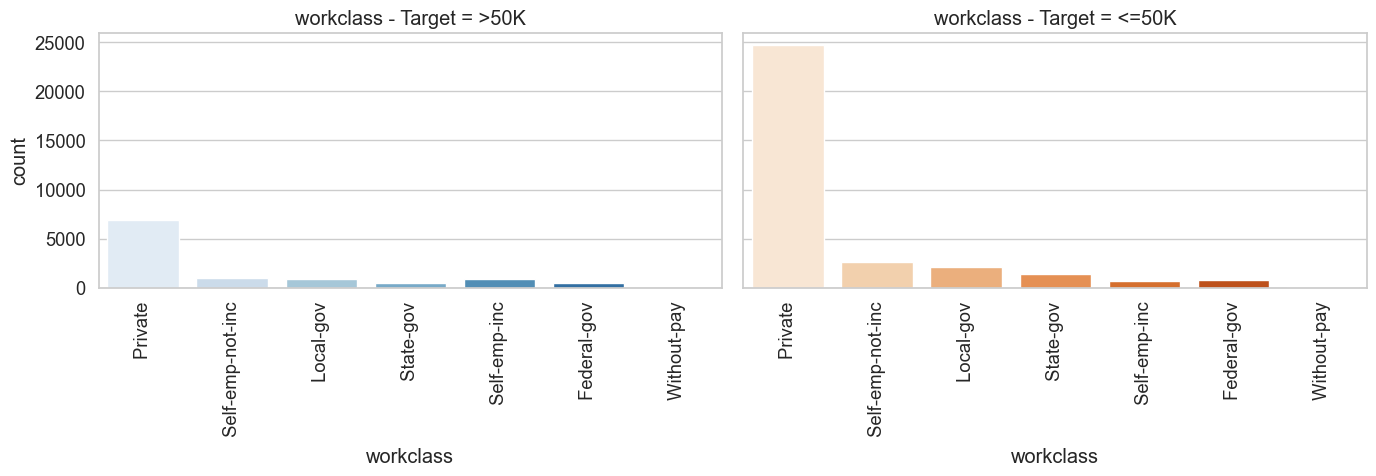

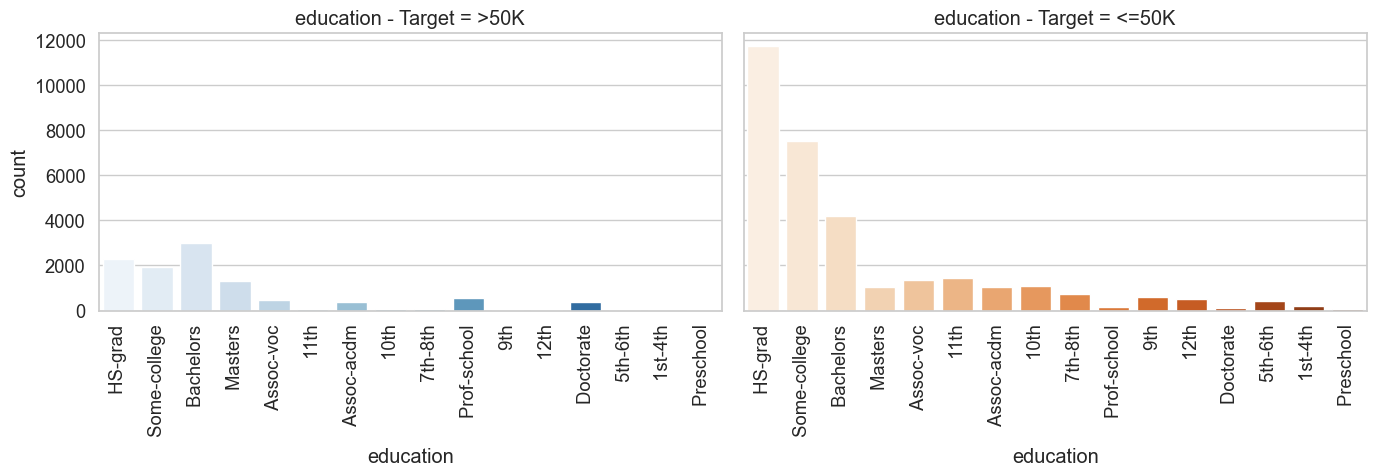

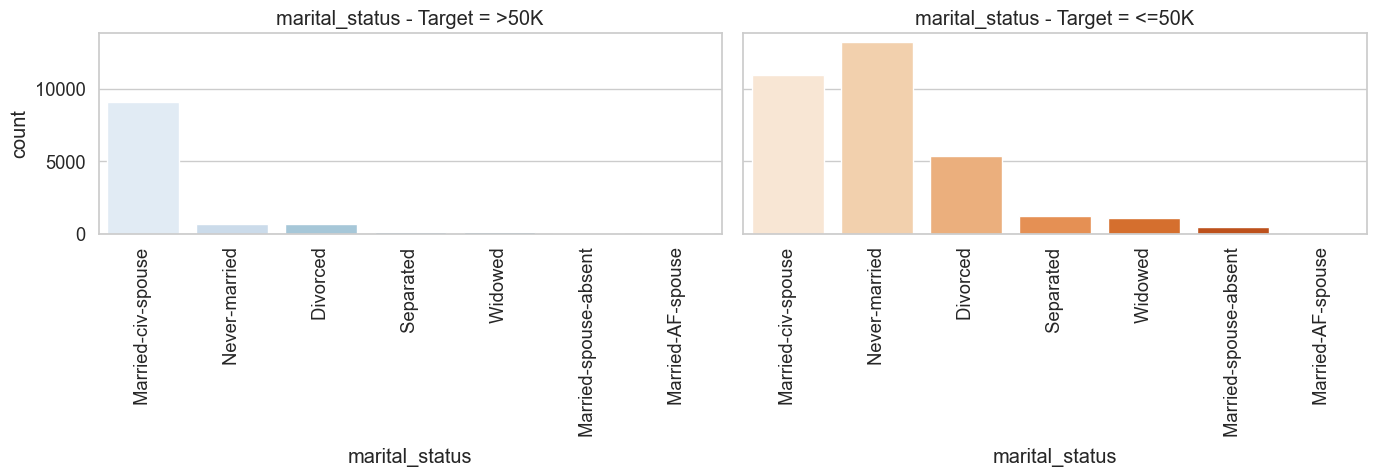

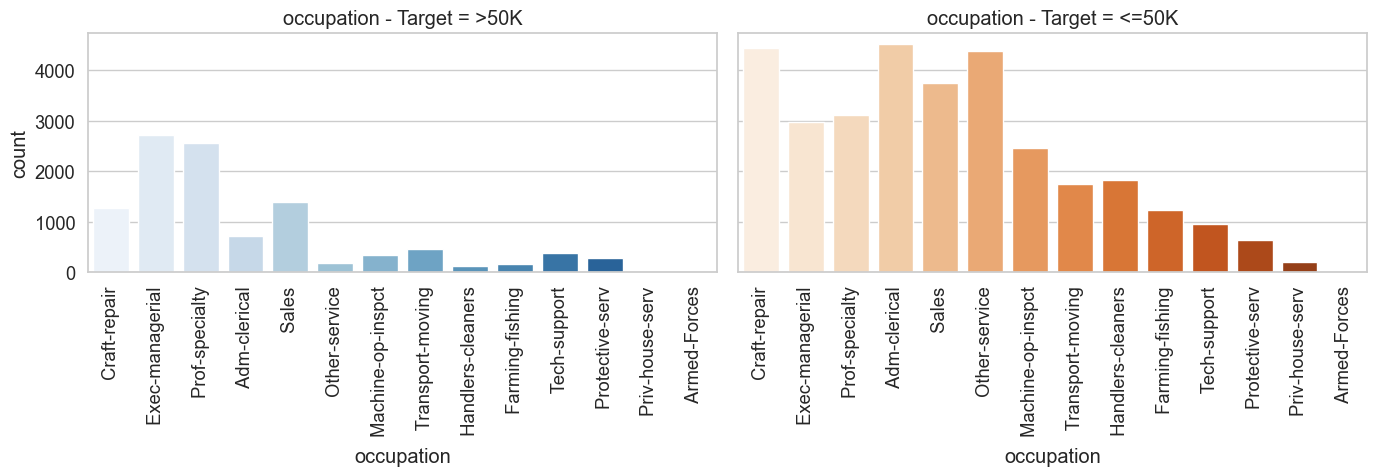

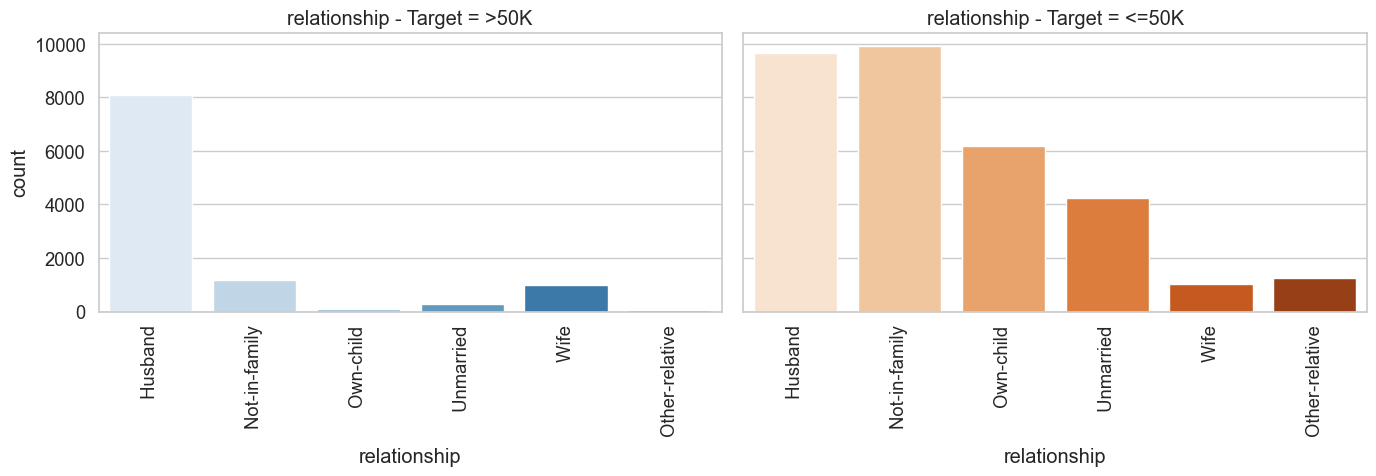

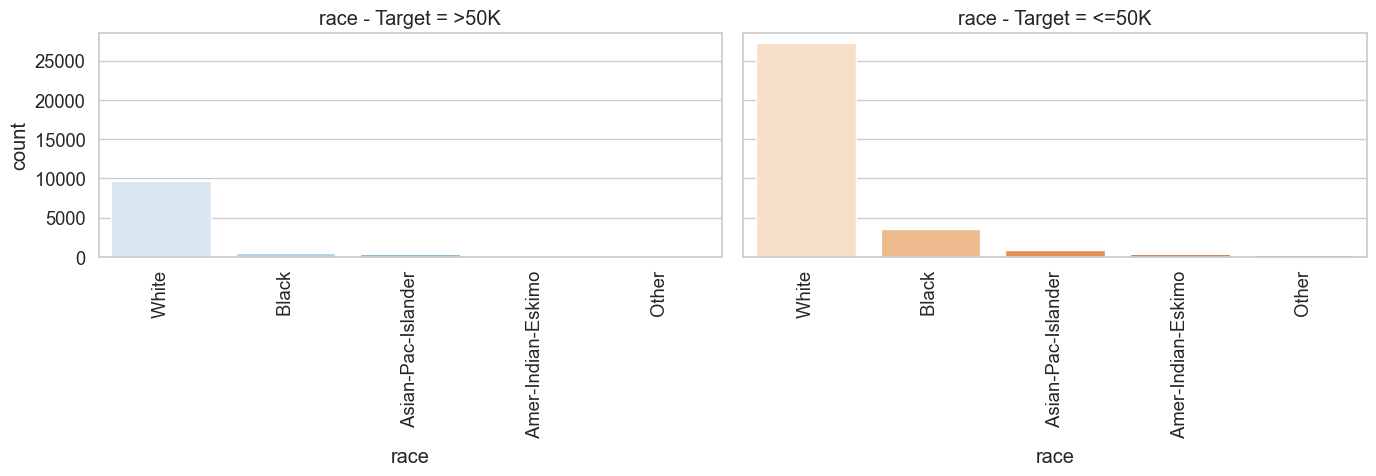

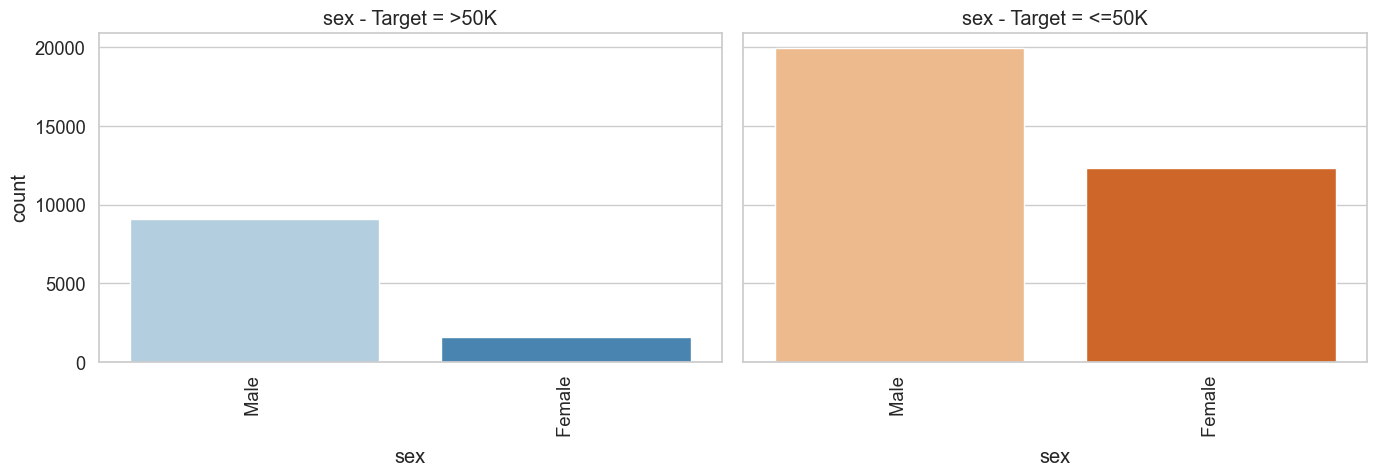

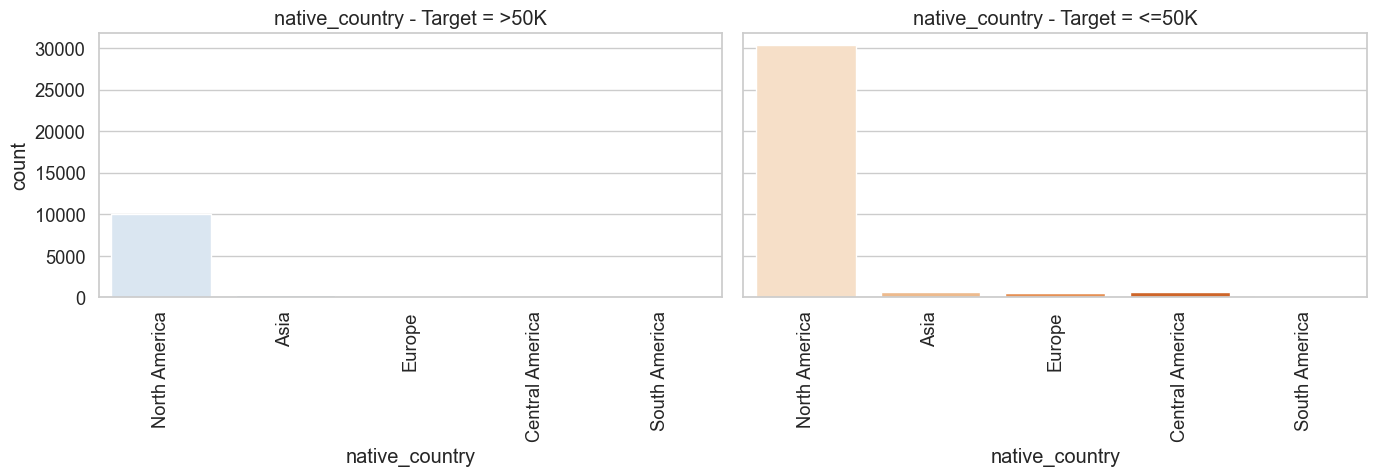

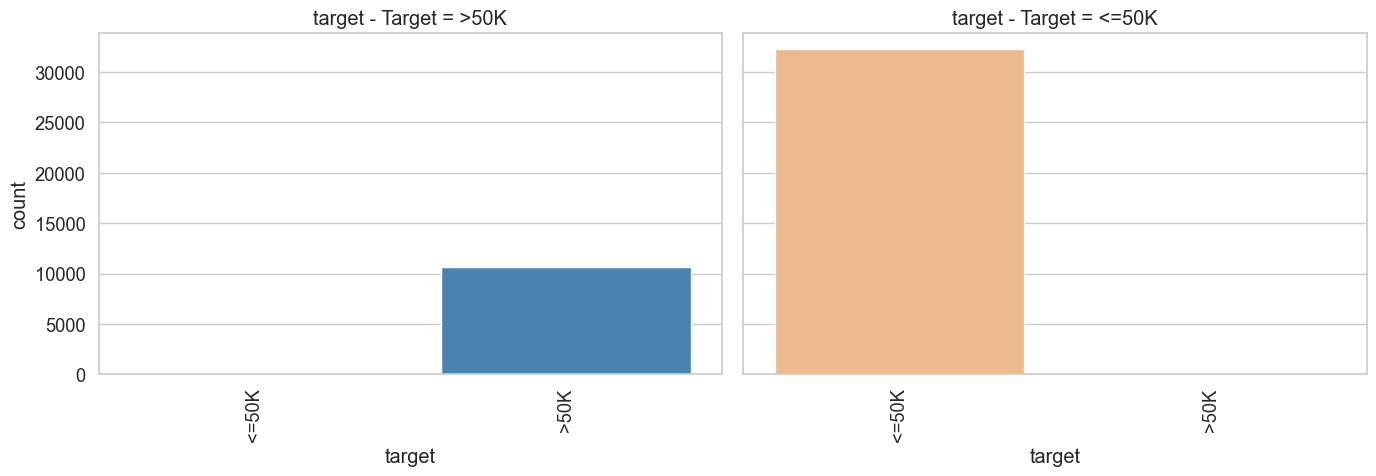

In [59]:


# charts for categorical features analysis
for column in df.columns:
    if df[column].dtype == 'object':
        fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
        sns.set_style('whitegrid')

        # Gráfico para TARGET = 1
        sns.countplot(data=df[df['target'] == '>50K'], x=column, order=df[column].value_counts().index, ax=axes[0], palette='Blues')
        axes[0].set_title(f'{column} - Target = >50K')
        axes[0].tick_params(axis='x', rotation=90)

        # Gráfico para TARGET = 0
        sns.countplot(data=df[df['target'] == '<=50K'], x=column, order=df[column].value_counts().index, ax=axes[1], palette='Oranges')
        axes[1].set_title(f'{column} - Target = <=50K')
        axes[1].tick_params(axis='x', rotation=90)

        plt.tight_layout()
        plt.show()

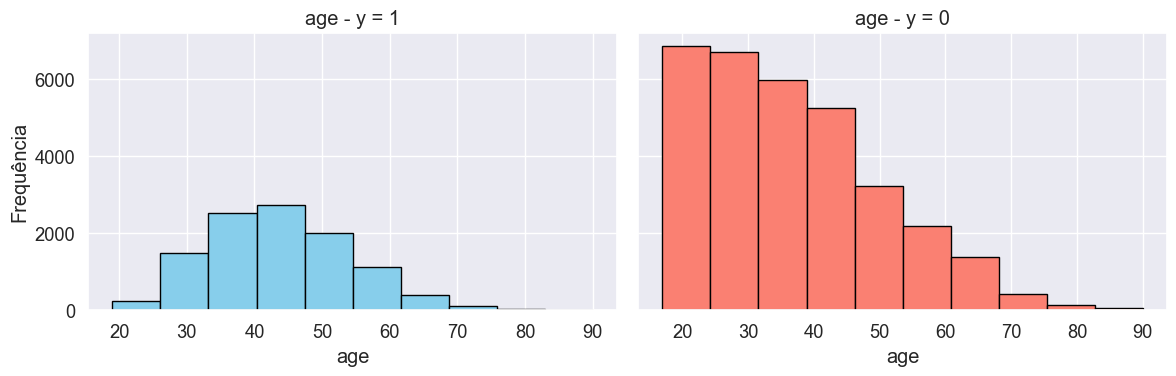

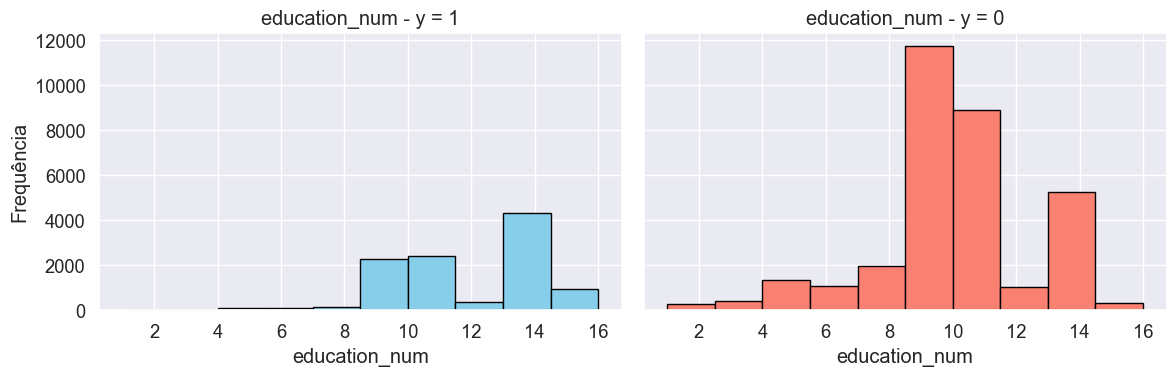

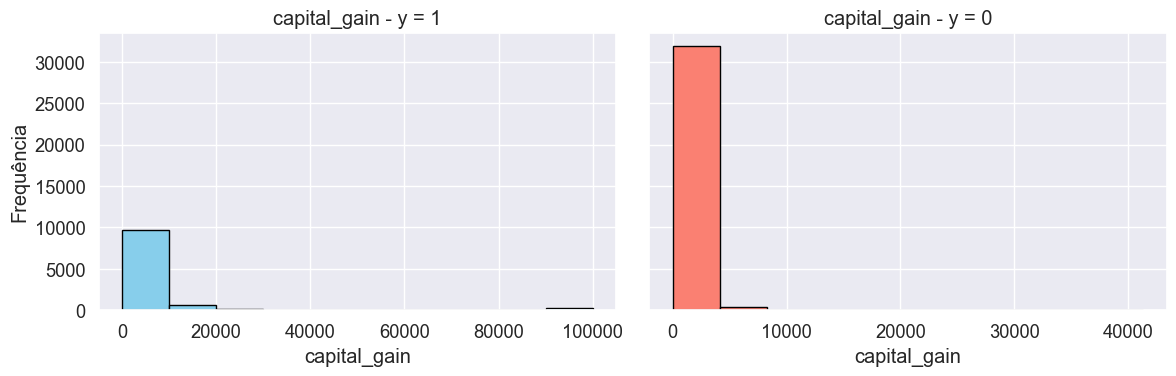

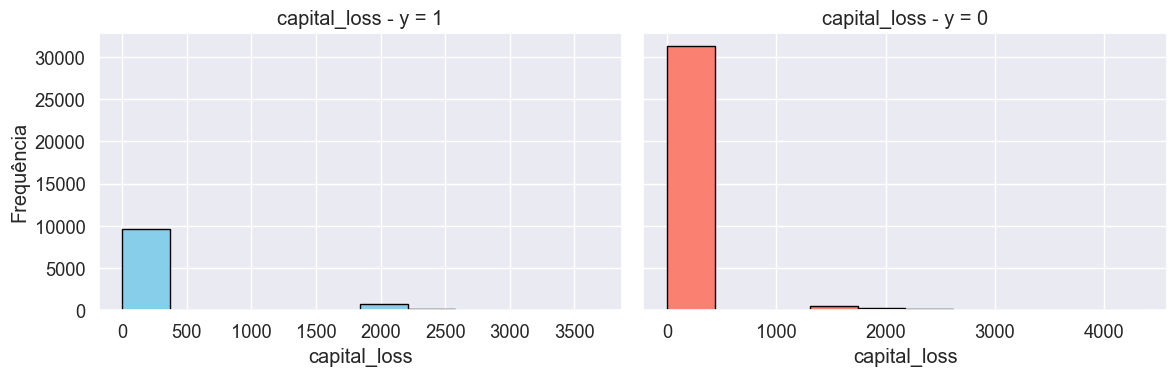

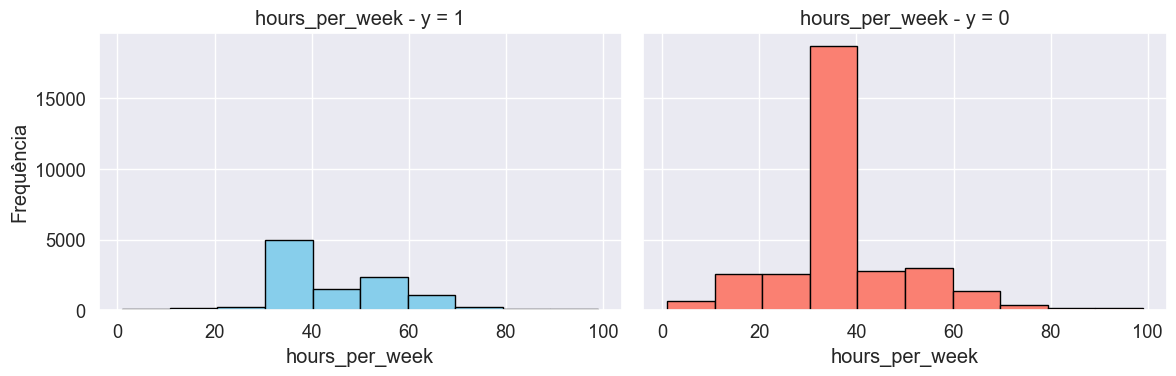

In [ ]:
# Loop pelas colunas numéricas
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    if column == 'y':  # Pula a variável alvo
        continue

    freq = len(df[column].value_counts())

    # Define o número de bins (usando sua lógica de agrupamento)
    bins = freq if freq <= 10 else 10

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    # Target = 1
    axes[0].hist(df[df['y'] == 1][column], bins=bins, edgecolor='black', color='skyblue')
    axes[0].set_title(f'{column} - y = 1')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequência')

    # Target = 0
    axes[1].hist(df[df['y'] == 0][column], bins=bins, edgecolor='black', color='salmon')
    axes[1].set_title(f'{column} - y = 0')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

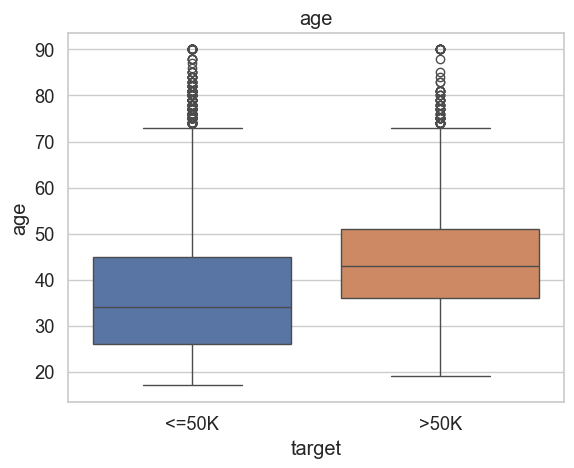

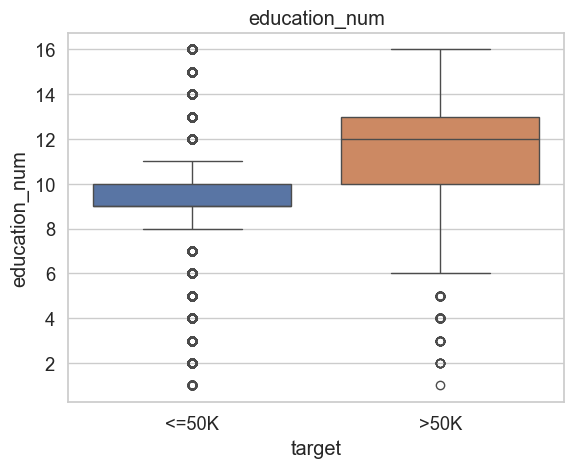

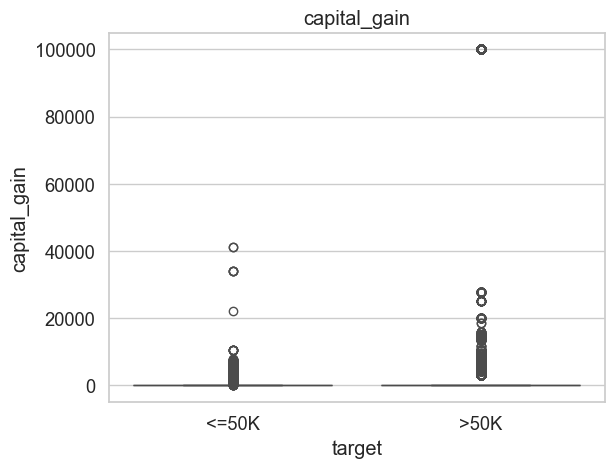

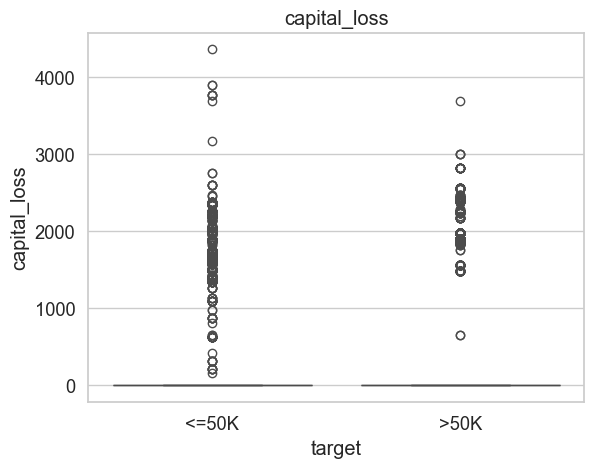

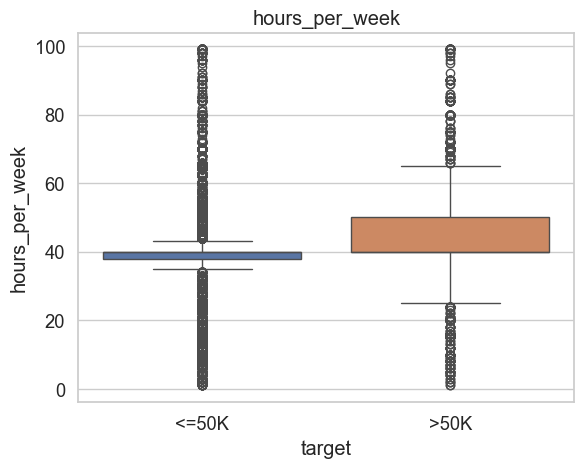

In [61]:
# Boxplot para features numéricas
for column in df.columns:
    if df[column].dtypes == 'int64':
        plt.figure()
        sns.boxplot(y=column, x='target', data= df, palette="deep")
        plt.title(column)

In [26]:
# Conclusões

In [27]:
#Hipóteses que levam uma pessoa a ganhar mais de 50K anual

## Criando um modelo de classificação

In [62]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target,y
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North America,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,North America,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North America,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North America,<=50K,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,North America,<=50K,0


In [82]:
df.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
y                  int32
dtype: object

### Fazer o split dos dados

In [ ]:
majority_class = df[df['y'] == 0]
minority_class = df[df['y'] == 1]

majority_downsampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_class),
                                random_state=42)

df_bal = pd.concat([majority_downsampled, minority_class])
X = df_bal.drop(columns=['y', 'target'])
y = df_bal['y']


In [113]:
#separar o alvo
y = df['y']
X = df.drop(columns=['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Spliting Categorical and Numerical Columns

In [114]:
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(include='int64').columns.tolist()

### Balanceamento do dataset

In [87]:
#smote = SMOTE(random_state=42)
#X_train_bal, y_train_bal = smote.fit_resample(num_cols, y_train)

# Verificando o balanceamento
#print("Antes:", y_train.value_counts())
#print("Depois:", y_train_bal.value_counts())

#### Pre-processors

In [115]:
num_transformer = StandardScaler()
#num_transformer = MinMaxScaler()

cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

#### Pipeline

In [116]:
# 7. Pipeline final com modelo
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    #('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

#### GridSearch
Trying to improve the model metrics

In [119]:
# Etapa 8: GridSearchCV focado no recall
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [120]:
#Testing the modeling using pipeline
#pipeline.fit(X_train, y_train)

#y_pred = pipeline.predict(X_test)
#print("Metrics report:")
#print(classification_report(y_test, y_pred))


#Testing the modeling using gridsearch
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
print("Best parameters:")
print(grid_search.best_params_)
print("Metrics report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
#Trying to balance the dataset or balancing using the SMOTE, decreased the model accuracy and f-1 score 


## Testando os modelos de classificação e imprimindo as métricas

In [ ]:
%%time

classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

plt.figure(figsize=(12,8))

for clf in classifiers:
    # instanciando o modelo
    clf.fit(x_treino_norm, y_treino)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred_test = clf.predict(x_teste_norm)
    y_pred_train = clf.predict(x_treino_norm)
    print("Accuracy:", metrics.accuracy_score(y_teste, y_pred_test))
    print("Precision:", metrics.precision_score(y_teste, y_pred_test))
    print("Recall:", metrics.recall_score(y_teste, y_pred_test))
    
    # imprimindo as métricas para os dados de treino
    print('\n-----Dados de Treino-----')
    print('MSE - treino', mean_squared_error(y_treino, y_pred_train))
    print('MAE - treino', median_absolute_error(y_treino, y_pred_train))
    print('R2 - treino', r2_score(y_treino, y_pred_train))
    
    # imprimindo as métricas para os dados de teste
    print('\n-----Dados de Teste-----')
    print('MSE - test', mean_squared_error(y_teste, y_pred_test))
    print('MAE - test', median_absolute_error(y_teste, y_pred_test))
    print('R2 - test', r2_score(y_teste, y_pred_test))
    print('Matriz Confusão\n',metrics.confusion_matrix(y_teste, y_pred_test))
    
    # plotando a curva ROC
    y_pred_proba = clf.predict_proba(x_teste_norm)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_teste,  y_pred_proba)
    auc = metrics.roc_auc_score(y_teste, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)

### Feature Importance para o modelo

In [ ]:
reg = LogisticRegression().fit(x_treino_norm, y_treino)
reg.score(x_treino_norm, y_treino)

In [ ]:
x_treino_df = pd.DataFrame(x_treino, columns = df.columns.tolist())

importance_df = pd.DataFrame()
importance_df['colunas'] = x_treino_df.columns.tolist()
importance_df['importância'] = reg.coef_.tolist()[0]
importance_df.sort_values('importância',ascending=False).set_index('colunas')

In [ ]:
coef=np.round(reg.coef_,3).tolist()
coef = pd.DataFrame({'feature':x_treino_df.iloc[:, 0:x_treino_df.shape[1]].columns,'coefficient':coef[0]})
coef = coef.sort_values('coefficient',ascending=False).set_index('feature')


coef.plot.barh(figsize=(20, 10))
plt.show()